In [1]:
## XGBoost 
# State 1 hot 
# Rurality Data
# SVI poverty index
# Minority?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import xgboost as xgb 
import shap
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import pairwise
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
main_path = Path.cwd()
data_path = main_path / 'Data'

#svi = pd.read_csv( data_path / 'Master Project Data' /'SVI Tract Data.csv',  )


In [4]:
# import stored methods 
path = Path.cwd()
main_path = Path.cwd()
data_path = main_path / 'Data'
from src.data import DataLoaders

ACS_pov =  DataLoaders.ACSData(2016,'block_group')
ARC =  DataLoaders.ARCPData()

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [5]:
ACS_pov = ACS_pov.data
ACS_pov['Tract'] = ACS_pov.index.str[:-1]
ACS_pov['geos'] = ACS_pov.index

In [6]:
ACS_pov = ACS_pov[['Tract', 'geos', 'inc_pct_poverty']]
ACS_pov

,Tract,geos,inc_pct_poverty
GEOID,,,
010010201001,01001020100,010010201001,0.191946
010010201002,01001020100,010010201002,0.044269
010010202001,01001020200,010010202001,0.382199
010010202002,01001020200,010010202002,0.111426
010010203001,01001020300,010010203001,0.042301
...,...,...,...
560459511001,56045951100,560459511001,0.094029
560459511002,56045951100,560459511002,0.062579
560459513001,56045951300,560459513001,0.261512


In [7]:
SVI = pd.read_csv('C:/Users/cle9a/Documents/rcp2/Data/Master Project Data/SVI Tract Data.csv',encoding='ISO-8859-1')
SVI['Tract'] = SVI['GEOID'].str[2:]

SVI

,GEOID,ST,STATE,ST_ABBR,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,...,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Tract
0,#_01015981901,1,ALABAMA,AL,Calhoun,"Census Tract 9819.01, Calhoun County, Alabama",24.243865,0,12,0,...,NaN,NaN,NaN,NaN,0,12,NaN,NaN,656.0,01015981901
1,#_01015981902,1,ALABAMA,AL,Calhoun,"Census Tract 9819.02, Calhoun County, Alabama",34.646714,0,12,0,...,NaN,NaN,NaN,NaN,0,12,NaN,NaN,146.0,01015981902
2,#_01015981903,1,ALABAMA,AL,Calhoun,"Census Tract 9819.03, Calhoun County, Alabama",13.926276,0,12,0,...,NaN,NaN,NaN,NaN,0,12,NaN,NaN,0.0,01015981903
3,#_01097003605,1,ALABAMA,AL,Mobile,"Census Tract 36.05, Mobile County, Alabama",0.732300,899,316,0,...,NaN,1.0,NaN,NaN,33,36,3.7,4.1,5135.0,01097003605
4,#_01097990000,1,ALABAMA,AL,Mobile,"Census Tract 9900, Mobile County, Alabama",0.000000,0,12,0,...,NaN,NaN,NaN,NaN,0,12,NaN,NaN,0.0,01097990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72832,#_51003010903,51,VIRGINIA,VA,Albemarle,"Census Tract 109.03, Albemarle County, Virginia",0.378015,3159,553,98,...,1.0,1.0,4.0,6.0,67,47,2.1,1.3,12094.0,51003010903
72833,#_51121020202,51,VIRGINIA,VA,Montgomery,"Census Tract 202.02, Montgomery County, Virginia",2.278257,2000,232,1140,...,1.0,1.0,4.0,7.0,102,64,6.0,3.6,2222.0,51121020202
72834,#_51700030100,51,VIRGINIA,VA,Newport News City,"Census Tract 301, Newport News city, Virginia",1.636259,4274,612,1647,...,1.0,1.0,4.0,9.0,436,139,14.9,4.6,6558.0,51700030100
72835,#_53033005302,53,WASHINGTON,WA,King,"Census Tract 53.02, King County, Washington",0.968062,5320,629,127,...,1.0,1.0,4.0,7.0,267,98,5.1,1.8,40043.0,53033005302


In [8]:
merged = ACS_pov.merge(SVI, how = 'left', left_on = 'Tract' , right_on ='Tract')
merged

,Tract,geos,inc_pct_poverty,GEOID,ST,STATE,ST_ABBR,COUNTY,LOCATION,AREA_SQMI,...,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,01001020100,010010201001,0.191946,#_01001020100,1,ALABAMA,AL,Autauga,"Census Tract 201, Autauga County, Alabama",3.790677,...,0.0,0.0,0.0,0.0,0.0,178,79,9.3,4.1,1018.0
1,01001020100,010010201002,0.044269,#_01001020100,1,ALABAMA,AL,Autauga,"Census Tract 201, Autauga County, Alabama",3.790677,...,0.0,0.0,0.0,0.0,0.0,178,79,9.3,4.1,1018.0
2,01001020200,010010202001,0.382199,#_01001020200,1,ALABAMA,AL,Autauga,"Census Tract 202, Autauga County, Alabama",1.284051,...,0.0,0.0,1.0,1.0,1.0,190,77,10.4,4.1,3835.0
3,01001020200,010010202002,0.111426,#_01001020200,1,ALABAMA,AL,Autauga,"Census Tract 202, Autauga County, Alabama",1.284051,...,0.0,0.0,1.0,1.0,1.0,190,77,10.4,4.1,3835.0
4,01001020300,010010203001,0.042301,#_01001020300,1,ALABAMA,AL,Autauga,"Census Tract 203, Autauga County, Alabama",2.065365,...,0.0,0.0,0.0,0.0,1.0,119,81,3.4,2.2,1836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213139,56045951100,560459511001,0.094029,#_56045951100,56,WYOMING,WY,Weston,"Census Tract 9511, Weston County, Wyoming",2355.226087,...,0.0,0.0,1.0,2.0,2.0,399,141,13.3,4.4,1933.0
213140,56045951100,560459511002,0.062579,#_56045951100,56,WYOMING,WY,Weston,"Census Tract 9511, Weston County, Wyoming",2355.226087,...,0.0,0.0,1.0,2.0,2.0,399,141,13.3,4.4,1933.0
213141,56045951300,560459513001,0.261512,#_56045951300,56,WYOMING,WY,Weston,"Census Tract 9513, Weston County, Wyoming",42.777804,...,0.0,0.0,0.0,1.0,1.0,499,157,13.3,4.0,3643.0
213142,56045951300,560459513002,0.098058,#_56045951300,56,WYOMING,WY,Weston,"Census Tract 9513, Weston County, Wyoming",42.777804,...,0.0,0.0,0.0,1.0,1.0,499,157,13.3,4.0,3643.0


In [9]:
merged.set_index('geos', inplace=True)
cols = ['inc_pct_poverty','RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3','RPL_THEME4']
SVI = merged[cols]
SVI

,inc_pct_poverty,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4
geos,,,,,
010010201001,0.191946,0.3913,0.5597,0.3735,0.0993
010010201002,0.044269,0.3913,0.5597,0.3735,0.0993
010010202001,0.382199,0.7065,0.3585,0.5821,0.7299
010010202002,0.111426,0.7065,0.3585,0.5821,0.7299
010010203001,0.042301,0.5659,0.8729,0.6429,0.3882
...,...,...,...,...,...
560459511001,0.094029,0.3925,0.6370,0.2331,0.8555
560459511002,0.062579,0.3925,0.6370,0.2331,0.8555
560459513001,0.261512,0.5093,0.6043,0.2862,0.6949


In [10]:
ARC = ARC.data
ARC

,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served
12,010010205002,32.470418,-86.424166,PRATTVILLE,AL,36066,Autauga,9/9/2016,1,1,...,0,1,1,0,None,2,0,0,0,0
18,010010208012,32.455173,-86.534590,PRATTVILLE,AL,36067,Autauga,9/30/2019,2,2,...,0,1,1,1,Tornadoes,5,0,0,1,0
23,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,5/4/2019,3,2,...,0,1,1,1,Other,1,0,0,0,0
24,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,9/27/2019,1,1,...,0,1,1,1,Tornadoes,1,0,0,0,0
27,010010208023,32.543983,-86.492100,PRATTVILLE,AL,36067,Autauga,12/2/2017,3,3,...,0,1,1,0,None,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862041,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,2,2,...,0,1,1,1,Wildfires,1,0,0,0,0
862042,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,4,2,0,0,0
862043,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,2,0,1,0,1
862044,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,4,4,...,0,1,1,1,Wildfires,3,0,0,0,0


In [11]:
ARC.columns

Index(['geoid', 'census_block_group_y', 'census_block_group_x', 'city',
       'state', 'zip', 'county', 'in_home_visit_date',
       'smoke_alarms_installed__9_volt_10_year_dhh_',
       '10_year_and_9_volt_alarms_installed', 'dhh_alarms_installed',
       'pre_existing_alarms', 'pre_existing_alarms_tested_and_working',
       'batteries_replaced', 'fire_escape_plans_made',
       'fire_safety_checklists_completed',
       'additional_hazard_education_conducted', 'additional_hazard_type',
       'people_served', 'youth_served', 'seniors_served',
       'veterans_military_members_and_military_family_members_served',
       'individuals_with_disabilities_access_or_functional_needs_served'],
      dtype='object')

In [12]:
# import stored methods 
#path = Path.cwd().parent.parent

#LoadAndCleanARCP = main_path /'src' /'data'/ 'LoadAndCleanARCP.py'
#LoadAndCleanACS = main_path /'src' /'data'/ 'LoadAndCleanACS.py'
# Run methods to obtain clean datasets 

#%run $LoadAndCleanARCP
#%run $LoadAndCleanACS

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


              inc_pct_poverty  RPL_THEME1  RPL_THEME2  RPL_THEME3  RPL_THEME4
geos                                                                         
010010201001         0.191946      0.3913      0.5597      0.3735      0.0993
010010201002         0.044269      0.3913      0.5597      0.3735      0.0993
010010202001         0.382199      0.7065      0.3585      0.5821      0.7299
010010202002         0.111426      0.7065      0.3585      0.5821      0.7299
010010203001         0.042301      0.5659      0.8729      0.6429      0.3882


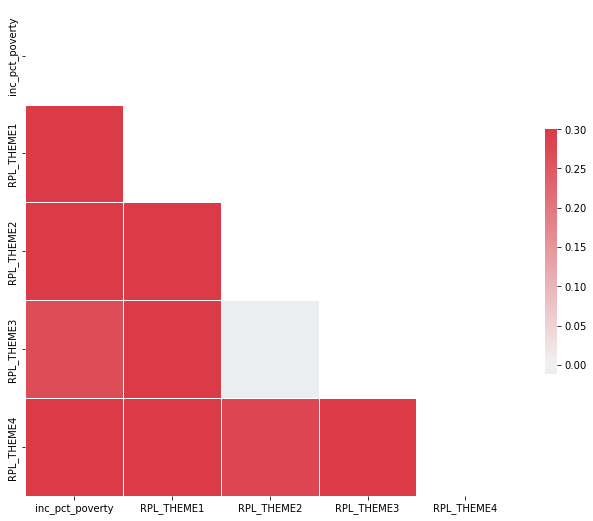

In [13]:
#Find correlated features in ACS dataset and identify the highly correlated relationships

# Create ACS correlation matrix
corr = SVI.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
 





#From highly correlated pairs, remove one of the Pair Vars from the ACS dataset except for the 'mort' variables
#ACS = ACS.drop(['house_pct_vacant', 'did_not_work_past_12_mo', 'house_pct_non_family', 'house_pct_rent_occupied',
#                           'race_pct_white', 'race_pct_nonwhitenh','race_pct_hisp', 'house_pct_incomplete_plumb',
#                           'house_pct_incomplete_kitchen', 'race_pct_whitenh','house_no_mort',
#                           'race_pct_black','house_pct_live_alone','house_pct_family_married','educ_bachelors',
#                           'heat_pct_electricity','house_pct_complete_kitchen','house_yr_pct_1960_2000'], axis=1) 





print (SVI.head())


In [14]:
#ACS['house_pct']

In [15]:
# smoke detector statistical model munging
#sm = pd.read_csv(  data_path /'Model Outputs'/'SmokeAlarmModelOutput.csv')
sm = pd.read_csv(  data_path /'Model Outputs'/'SmokeAlarmModelMultiLevel.csv')
print(np.unique(sm.geography))
sm


['block_group' 'county' 'state' 'tract']


,geoid,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography
0,#_010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group
1,#_010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group
2,#_010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group
3,#_010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group
4,#_010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group
...,...,...,...,...,...,...,...,...,...
213734,#_560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213735,#_560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213736,#_560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213737,#_560459513002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state


In [16]:
sm['geoid'] = sm['geoid'].str[2:]
sm['tract'] = sm['geoid'].str[:-1]
sm.set_index('geoid', inplace =  True)
sm_all = sm.copy()
#sm_all = sm[ sm['geography'].isin(['county','state']) ]

sm = sm[ sm['geography'].isin(['tract','block_group']) ]

sm_all

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract
geoid,,,,,,,,,
010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group,01013953400
010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group,01013953400
010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group,01073002303
010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group,01073003500
010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group,01073003500
...,...,...,...,...,...,...,...,...,...
560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100
560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100
560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951300


In [17]:
sm

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract
geoid,,,,,,,,,
010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group,01013953400
010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group,01013953400
010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group,01073002303
010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group,01073003500
010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group,01073003500
...,...,...,...,...,...,...,...,...,...
560210004012,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401
560210004013,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401
560210004014,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401


In [18]:
def create_rurality_data(sm,subset_county = False): 
    #Rurality Data Munging 
    rd = pd.read_csv( data_path / 'Master Project Data' /'Tract Rurality Data.csv', dtype = {'Tract':'object'},encoding = 'latin-1' )
    rd['Population Density (per square mile), 2010'] =  rd['Population Density (per square mile), 2010'].str.replace(',','').astype('float')
    rd = rd.iloc[:,[0,2,4,6,8]]
    block_tract = sm['tract'].to_frame()
    block_tract = block_tract.reset_index()
    rd = block_tract.merge(rd, how = 'left', left_on = 'tract' , right_on ='Tract')
    rd.set_index('geoid',inplace= True)
    rd = rd.iloc[:,2:]
    rd['Select State'] = rd['Select State'].astype('category')

    # add state level model estimates 
    sms = pd.rd = pd.read_csv( data_path /'Model Outputs'/'Smoke_Alarm_Single_Level'/ 'SmokeAlarmModelState.csv')
    sms['geoid'] = sms['geoid'].str[2:]
    sms =  sms.loc[:,['geoid','detectors_found_prc']]
    sms = sms.rename(columns= {'geoid':'state_geoid'}  )

    rd['state_geoid'] = rd.index.str[:2]
    rd = rd.reset_index()
    rd = rd.merge(sms,how = 'left', on = 'state_geoid' )
    rd.drop('state_geoid',axis = 1,inplace = True)
    rd = rd.rename(columns = {'detectors_found_prc':'state_detectors_found_prc'}) 
    rd = rd.set_index('geoid')


    # add county level estimates
    smc = pd.read_csv( data_path /'Model Outputs'/'Smoke_Alarm_Single_Level'/ 'SmokeAlarmModelCounty.csv')
    smc['geoid'] = smc['geoid'].str[2:]
    if subset_county:
        smc.iloc[0::2,:] = np.nan
    smc =  smc.loc[:,['geoid','detectors_found_prc']]
    smc = smc.rename(columns= {'geoid':'county_geoid'}  )

    rd['county_geoid'] = rd.index.str[:5]
    rd = rd.reset_index()
    rd = rd.merge(smc,how = 'left', on = 'county_geoid' )
    rd.drop('county_geoid',axis = 1,inplace = True)
    rd = rd.rename(columns = {'detectors_found_prc':'county_detectors_found_prc'}) 
    rd = rd.set_index('geoid')
  #  rd['RUCA_rurality_index'] = rd['Primary RUCA Code 2010']
  #  rd[rd['RUCA_rurality_index'] > 10 ] = np.NaN
    rd = rd.iloc[:,3:]

    return rd 

# alternative 1 hot based encoding
#rd = rd.merge( pd.get_dummies(rd['Select State']), how = 'left', on= 'geoid')


In [19]:
rd = create_rurality_data(sm,True)
rd_all = create_rurality_data(sm_all)

In [20]:
rd

,"Population Density (per square mile), 2010",state_detectors_found_prc,county_detectors_found_prc
geoid,,,
010139534001,NaN,58.37,NaN
010139534002,NaN,58.37,NaN
010730023034,NaN,58.37,NaN
010730035002,NaN,58.37,NaN
010730035003,NaN,58.37,NaN
...,...,...,...
560210004012,NaN,63.00,55.44
560210004013,NaN,63.00,55.44
560210004014,NaN,63.00,55.44


In [21]:
def train_model(X = rd, SVI = pd.DataFrame(), y= sm, predict ='Presence', modeltype='XGBoost'):
    from scipy.stats import zscore, pearsonr
    from sklearn.metrics import auc, accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score, r2_score

    assert(predict in ['Presence', 'Working']) 
   
    
    # Define model types & parameters 
    
    if modeltype =='LinearRegression':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    if modeltype =='ElasticNet':    
        from sklearn.linear_model import ElasticNet
        model = ElasticNet()
    if modeltype =='Ridge':    
        from sklearn.linear_model import Ridge
        model = Ridge()
    if modeltype =='Lasso':    
        from sklearn.linear_model import Lasso
        model = Lasso()       
        
       
        
    elif modeltype =='XGBoost':
        model = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = 0)
            
  
    if  predict == 'Presence':
        y = y['detectors_found_prc']
    elif predict =='Working':
        y = y['detectors_working_prc']


    # merge in ACS Data into X unless NFIRS-Only model
    if not SVI.empty:
        X = X.merge(SVI, how ='left',left_index = True, right_index = True)
        print(X.size)
        print(y.size)
        #X = X[X.index.isin(y.index)]
        #y = y[y.index.isin(X.index)]
        print(X.size)
        print(y.size)
        y = y.filter(X.index)
    
    # Create 80/20 training/testing set split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2 )

    # Perform cross-validation 

    #scaler = preprocessing.StandardScaler().fit(X)
    #scaler.transform(X)
    #print ('Cross Val Score:')
    #print(cross_val_score(model, X, y))

    # Standardize features by removing the mean and scaling to unit variance
    
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_columns = X_train.columns
    #X_train =  pd.DataFrame(scaler.transform(X_train), columns = X_columns )
    #X_test  =  pd.DataFrame(scaler.transform(X_test) , columns = X_columns )

    # Fit model to training set

    model = model.fit(X_train,y_train)

    # Calculate training set performance
    train_predictions = model.predict(X_train)
    print('-----Training_Performance------')
    print(mean_squared_error(y_train, train_predictions))
    print ('Test RMSE: {}'.format(mean_squared_error(y_train, train_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_train, train_predictions)) )
    sns.scatterplot(y_train,train_predictions) 
    plt.show()
    
    # Calculate test set performance
    test_predictions = model.predict(X_test)
    print ('-----Test Performance ----- ')
    print ('Test RMSE: {}'.format(mean_squared_error(y_test, test_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_test, test_predictions)) )
    sns.scatterplot(y_test,test_predictions) 
    plt.show()
    print ('Test Correlation: {}'.format(pearsonr(y_test, test_predictions)) )
    print ('Test R-squared: {}'.format(r2_score(y_test, test_predictions)) )


    #Calculate feature importance for each model
    if modeltype == 'XGBoost':
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        print("\n Feature ranking:")
        for f in range(len(X_test.columns)):
            print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]])) 


    return  model,X_test,y_test



In [22]:
def train_model_justSVI(SVI = pd.DataFrame(), y= sm, predict ='Presence', modeltype='XGBoost'):
    from scipy.stats import zscore, pearsonr
    from sklearn.metrics import auc, accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score, r2_score

    assert(predict in ['Presence', 'Working']) 
   
    
    # Define model types & parameters 
    
    if modeltype =='LinearRegression':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    if modeltype =='ElasticNet':    
        from sklearn.linear_model import ElasticNet
        model = ElasticNet()
    if modeltype =='Ridge':    
        from sklearn.linear_model import Ridge
        model = Ridge()
    if modeltype =='Lasso':    
        from sklearn.linear_model import Lasso
        model = Lasso()       
        
       
        
    elif modeltype =='XGBoost':
        model = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = 0)
            
  
    if  predict == 'Presence':
        y = y['detectors_found_prc']
    elif predict =='Working':
        y = y['detectors_working_prc']


    # merge in ACS Data into X unless NFIRS-Only model
    if not SVI.empty:
        X = SVI
        print(X.size)
        print(y.size)
        X = X[X.index.isin(y.index)]
        y = y[y.index.isin(X.index)]
        print(X.size)
        print(y.size)
        y = y.filter(X.index)
    
    # Create 80/20 training/testing set split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2 )

    # Perform cross-validation 

    #scaler = preprocessing.StandardScaler().fit(X)
    #scaler.transform(X)
    #print ('Cross Val Score:')
    #print(cross_val_score(model, X, y))

    # Standardize features by removing the mean and scaling to unit variance
    
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_columns = X_train.columns
    #X_train =  pd.DataFrame(scaler.transform(X_train), columns = X_columns )
    #X_test  =  pd.DataFrame(scaler.transform(X_test) , columns = X_columns )

    # Fit model to training set

    model = model.fit(X_train,y_train)

    # Calculate training set performance
    train_predictions = model.predict(X_train)
    print('-----Training_Performance------')
    print(mean_squared_error(y_train, train_predictions))
    print ('Test RMSE: {}'.format(mean_squared_error(y_train, train_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_train, train_predictions)) )
    sns.scatterplot(y_train,train_predictions) 
    plt.show()
    
    # Calculate test set performance
    test_predictions = model.predict(X_test)
    print ('-----Test Performance ----- ')
    print ('Test RMSE: {}'.format(mean_squared_error(y_test, test_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_test, test_predictions)) )
    sns.scatterplot(y_test,test_predictions) 
    plt.show()
    print ('Test Correlation: {}'.format(pearsonr(y_test, test_predictions)) )
    print ('Test R-squared: {}'.format(r2_score(y_test, test_predictions)) )


    #Calculate feature importance for each model
    if modeltype == 'XGBoost':
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        print("\n Feature ranking:")
        for f in range(len(X_test.columns)):
            print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]])) 


    return  model,X_test,y_test



124800
15600
124800
15600
-----Training_Performance------
71.05448462447437
Test RMSE: 8.429382220808021
Test MAE: 6.071379255578591


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


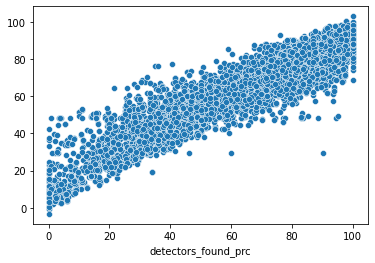

-----Test Performance ----- 
Test RMSE: 10.903389844231206
Test MAE: 7.73728524626524


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


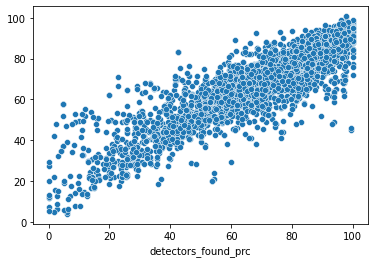

Test Correlation: (0.8690030324269559, 0.0)
Test R-squared: 0.7499370008806869

 Feature ranking:
1. county_detectors_found_prc (0.448462)
2. state_detectors_found_prc (0.166970)
3. RPL_THEME1 (0.101554)
4. RPL_THEME3 (0.095798)
5. RPL_THEME2 (0.083083)
6. RPL_THEME4 (0.082206)
7. inc_pct_poverty (0.021926)
8. Population Density (per square mile), 2010 (0.000000)


In [23]:
mdl,X_test,y_test = train_model(X = rd, SVI=SVI, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
All-NaN slice encountered


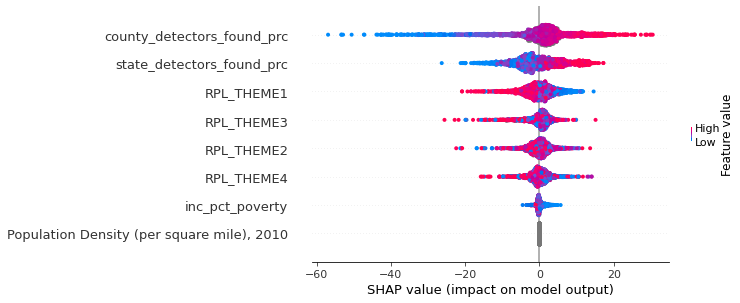

In [24]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

1065720
15600
77530
15506
-----Training_Performance------
116.01278185527904
Test RMSE: 10.770922980658577
Test MAE: 8.091209162736623


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


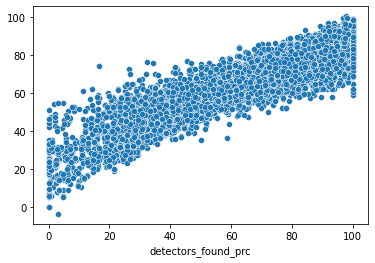

-----Test Performance ----- 
Test RMSE: 13.66737658810552
Test MAE: 10.21897649916505


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


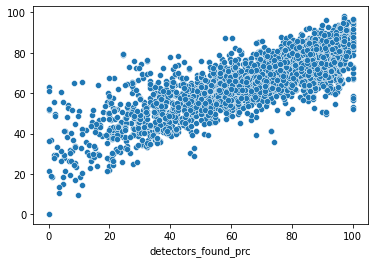

Test Correlation: (0.8068913683824914, 0.0)
Test R-squared: 0.6149782175692101

 Feature ranking:
1. RPL_THEME1 (0.275436)
2. RPL_THEME4 (0.231614)
3. RPL_THEME3 (0.218927)
4. RPL_THEME2 (0.213566)
5. inc_pct_poverty (0.060457)


In [25]:
mdl_justSVI,X_test,y_test = train_model_justSVI(SVI = SVI, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


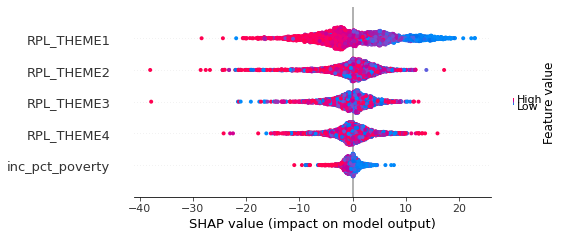

In [26]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl_justSVI).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

In [27]:
sm_all['rd_SVI_pov'] =  mdl.predict(rd_all.merge(SVI,how = 'left', left_index = True, right_index = True) )
sm_all['Just_SVI_pov'] =  mdl_justSVI.predict(rd_all.merge(SVI,how = 'left', left_index = True, right_index = True)[cols])

In [28]:
sm_all.loc[:,['num_surveys','geography',
              'detectors_found_prc',
              'detectors_working_prc',
              'rd_SVI_pov',
              'Just_SVI_pov'] ]
sm_all = sm_all.merge(rd_all['Population Density (per square mile), 2010'],how = 'left',left_index = True,right_index = True)
sm_all.index =  '#_' + sm_all.index 

In [29]:
sm_all.to_csv(path / 'Data' / 'Model Outputs' / 'SmokeAlarmPredictiveModel_USA_SVI_pov.csv')

In [30]:
sm_all.columns

Index(['num_surveys', 'detectors_found_total', 'detectors_found_prc',
       'detectors_found_CI', 'detectors_working_total',
       'detectors_working_prc', 'detectors_working_CI', 'geography', 'tract',
       'rd_SVI_pov', 'Just_SVI_pov',
       'Population Density (per square mile), 2010'],
      dtype='object')

In [67]:
# REST OF NOTEBOOK IS OLD

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='No_ACS_Predictions'>

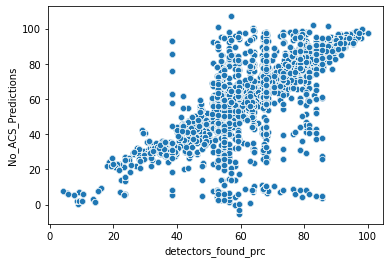

In [79]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['No_ACS_Predictions'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='ACS_commonCols_Predictions'>

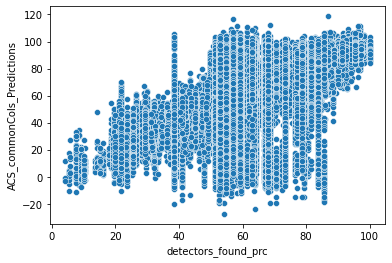

In [80]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['ACS_commonCols_Predictions'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Full_Predictions'>

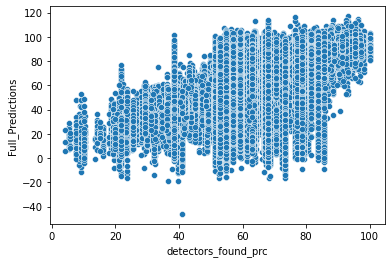

In [81]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['Full_Predictions'])


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Avg_Predictions'>

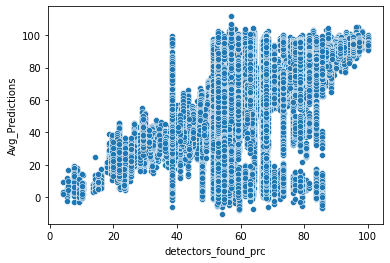

In [83]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['Avg_Predictions'])


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='No_ACS_Predictions'>

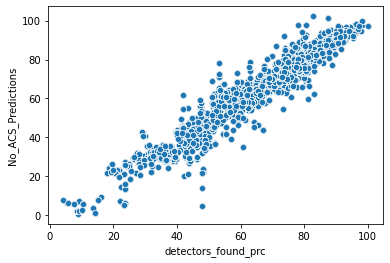

In [84]:
# plot of county predictions
sns.scatterplot(sm_all['detectors_found_prc'].where(sm_all['geography'] == 'county') ,sm_all['No_ACS_Predictions'].where(sm_all['geography'] == 'county' ) )


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Avg_Predictions'>

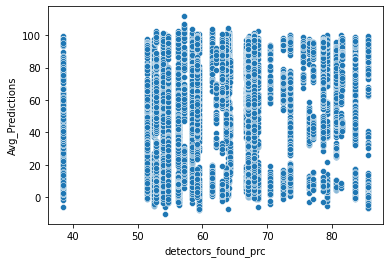

In [85]:
# plot of county predictions
sns.scatterplot(sm_all['detectors_found_prc'].where(sm_all['geography'] == 'state') ,sm_all['Avg_Predictions'].where(sm_all['geography'] == 'state' ) )